# Kontrol Kecepatan Kipas AC Dengan Kontrol Fuzzy
#### Abdullah Farhan(09011181722081)

--------------------------------------------------------------------

Pendingin Ruangan bekerja dengan menggunakan kipas atau kompresor, umumnya jika ada banyak orang didalam ruangan, maka suhu ruangan akan menjadi panas dan pendingin ruangan akan bekerja lebih keras untuk mendinginkan ruangan tersebut suhu dan jumlah orang pada ruangan mempengaruhi kinerja pada putaran kipas, dengan menggunakan 2 parameter atau variabel, yaitu **Jumlah Orang Dalam Ruangan** dan **suhu/temperatur**. Dari kedua variabel tersebut, akan dihasilkan sebuah output yaitu nilai putaran **kipas ac**. Pada sistem ini digunakan logika fuzzy, dengan metode mamdani untuk menentukan prediksi cuaca berdasarkan parameter yang ada.

Dari latar belakang tersebut, setiap keadaan dari varibel input dan output akan dijabarkan dalam linguistik sebagai berikut:
### Input
Suhu
 - **Sangat Dingin:** 15 - 24 Derajat Celcius
 - **Dingin:** 16 - 32 Derajat Celcius
 - **Normal:** 24 - 40 Derajat Celcius
 - **Panas:** 32 - 41 Derajat Celcius

Jumlah Orang
 - **Sedikit:** 1 - 40 Orang
 - **Sedang:** 20 - 60 Orang
 - **Banyak:** 40 - 80 Orang
 - **Full:** 60 - 100 Orang
 
### Output
Putaran
 - **Dianggap Mati:** 0 - 64 PWM
 - **Pelan:** : 64 - 192 PWM
 - **Sedang:** : 128 - 255 PWM
 - **Cepat:** 192 - 300 PWM
                     PWM (PULSE wITH MODULATION)
____________________________________________________________________
 

### Mengimpor library untuk fuzzy
Beberapa library yang digunakan itu adalah _matplotlib.pyplot_, _numpy_ dan _skfuzzy_.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

## FUZZYFIKASI

Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).


#### VARIABEL INPUT

* Suhu

In [2]:
suhu = np.arange (15, 41, 1)

* Orang

In [3]:
orang = np.arange (1,101, 1)

###  Variabel Output

* Putaran Kipas

In [4]:
putaran = np.arange (0, 300, 1)

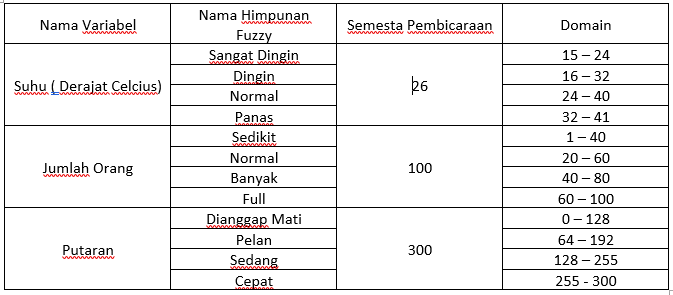

In [5]:
orang_sedikit        = fuzz.trimf(orang, [1, 1, 40])
orang_sedang          = fuzz.trimf(orang, [20, 40, 60])
orang_banyak         = fuzz.trimf(orang, [40, 60, 80])
orang_full          = fuzz.trimf(orang, [80, 100, 101])

Dengan fungsi keanggotaan:

\begin{equation}
  JumlahOrang['sedikit'] = \mu JumlahOrang(x)=\begin{cases}
    (x - 1)/(20 - 1) , & \text{$1 \leq x \leq 20$}.\\
    (40 - x)/(40 - 20) , & \text{$20 \ < x \leq 40$}.\\
    0, & \text{$x\geq 40$}.
  \end{cases}
  \\
  JumlahOrang['sedang'] = \mu JumlahOrang(x)=\begin{cases}
    (x - 20)/(40 - 20) , & \text{$20 \ < x \ <40$}.\\
    (60 - x)/(60 - 40) , & \text{$40 \ < x \ < 60$}.\\
    0, & \text{$x\geq 60$}.
  \end{cases}
  \\
     JumlahOrang['banyak'] = \mu JumlahOrang(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (x - 40)/(60 - 40) , & \text{$40 \ < x \ < 60$}.\\
    (80 - x)/(80 - 60) , & \text{$60 \ < x \ < 80$}.\\
  \end{cases}
  \\ JumlahOrang['full'] = \mu JumlahOrang(x)=\begin{cases}
    (x - 60)/(80 - 60) , & \text{$60 \ < x \ < 80$}.\\
    (100 - x)/(100 - 80) , & \text{$80 \ < x \leq 100$}.\\
    0, & \text{$x\geq 100$}.
  \end{cases}
\end{equation}


PLOTTING JUMLAH ORANG


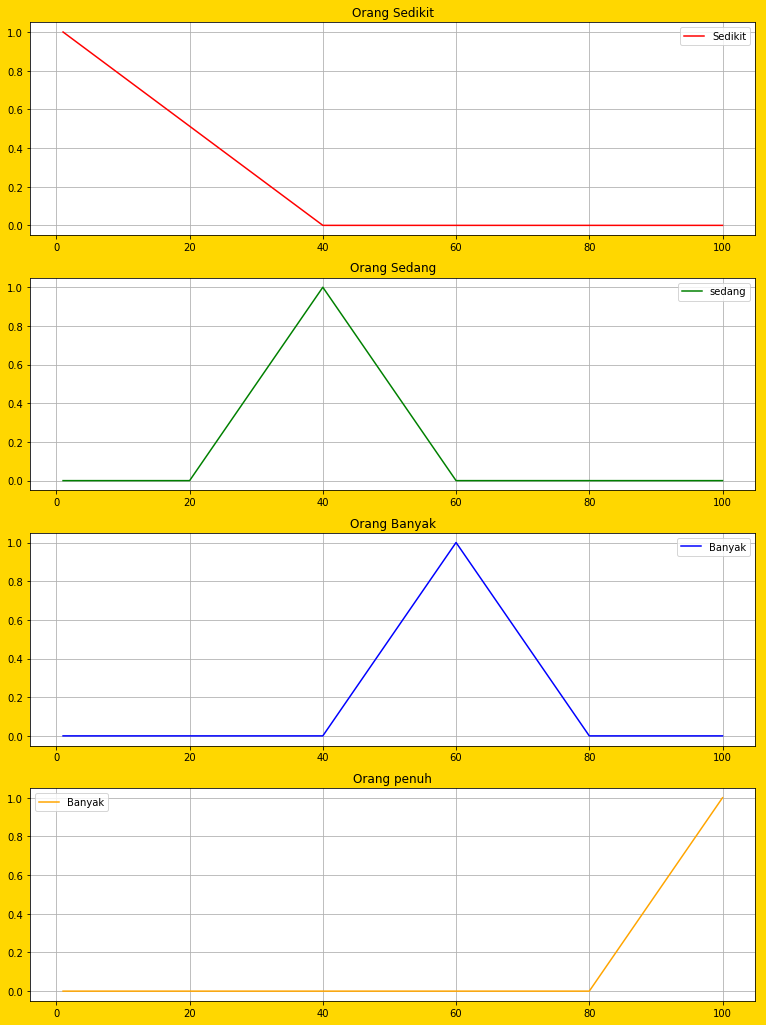

In [44]:


fig, (ax0,ax1,ax2,ax3) = plt.subplots(nrows= 4 ,facecolor='gold', figsize=(13, 18))
ax0.plot(orang, orang_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.set_title('Orang Sedikit')
ax0.grid()
ax0.legend()

ax1.plot(orang, orang_sedang, 'green', linewidth=1.5, label='sedang')
ax1.set_title('Orang Sedang')
ax1.grid()
ax1.legend()

ax2.plot(orang, orang_banyak, 'blue', linewidth=1.5, label='Banyak')
ax2.set_title('Orang Banyak')
ax2.grid()
ax2.legend()

ax3.plot(orang, orang_full, 'orange', linewidth=1.5, label='Banyak')
ax3.set_title('Orang penuh')
ax3.grid()
ax3.legend()



## Fuzzyfikasi Suhu 

In [7]:
suhu_sdingin     = fuzz.trimf(suhu, [15, 15, 24])
suhu_dingin        = fuzz.trimf(suhu, [16, 24, 32])
suhu_normal         = fuzz.trimf(suhu, [24, 32, 40])
suhu_panas         = fuzz.trimf(suhu, [32, 40, 40])

Dengan fungsi keanggotaan:

\begin{equation}
  Suhu['Sangat Dingin'] = \mu Suhu(x)=\begin{cases}
    (x - 15)/(19,5 - 15) , & \text{$15 \leq x \leq 19,5$}.\\
    (24 - x)/(24 - 19,5) , & \text{$19,5 \ < x \leq 24$}.\\
    0, & \text{$x\ < 15  atau x > 24$}.
  \end{cases}
  \\
  Suhu['Dingin'] = \mu Suhu(x)=\begin{cases}
    (x - 16)/(24 - 16) , & \text{$16 \ < x \ <24$}.\\
    (32 - 16)/(32 - 24) , & \text{$24 \ < x \ < 32$}.\\
    0, & \text{$x\ < 16 atau x > 32$}.
  \end{cases}
  \\
     Suhu['Normal'] = \mu Suhu(x)=\begin{cases}
    0, & \text{$x\leq 80$}.\\
    (x - 24)/(32 - 24) , & \text{$24 \ < x \ < 32$}.\\
    (40 - x)/(40 - 32) , & \text{$32 \ < x \ < 40$}.\\
  \end{cases}
  \\ Suhu['Panas'] = \mu Suhu(x)=\begin{cases}
    (x - 32)/(36,5 - 32) , & \text{$32 \ < x \ < 36,5$}.\\
    (41 - x)/(41 - 36,5) , & \text{$36,5 \ < x \leq 41$}.\\
    0, & \text{$x\geq 41$}.
  \end{cases}
\end{equation}


PLOTTING SUHU

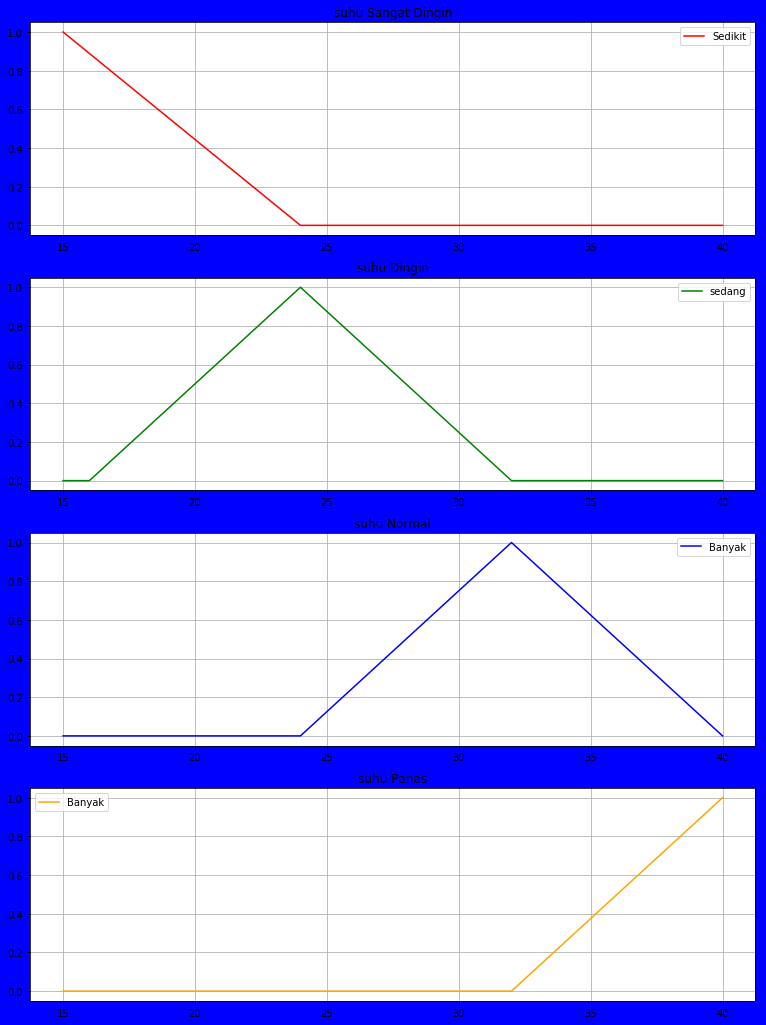

In [8]:
fig, (ax4,ax5,ax6,ax7) = plt.subplots(nrows= 4 ,facecolor='blue', figsize=(13, 18))
ax4.plot(suhu, suhu_sdingin, 'red', linewidth=1.5, label='Sedikit')
ax4.set_title('suhu Sangat Dingin')
ax4.grid()
ax4.legend()

ax5.plot(suhu, suhu_dingin, 'green', linewidth=1.5, label='sedang')
ax5.set_title('suhu Dingin')
ax5.grid()
ax5.legend()

ax6.plot(suhu, suhu_normal, 'blue', linewidth=1.5, label='Banyak')
ax6.set_title('suhu Normal')
ax6.grid()
ax6.legend()

ax7.plot(suhu, suhu_panas, 'orange', linewidth=1.5, label='Banyak')
ax7.set_title('suhu Panas')
ax7.grid()
ax7.legend()


## Fuzzyfikasi Output (Putaran)
putaran menggunakan satuan PWM (Pulse With Modulation) dengan rentang antara 1 hingga 300 PWM

In [178]:
putaran_dianggapmati       = fuzz.trapmf(putaran, [1, 1, 64, 128])
putaran_pelan             = fuzz.trimf(putaran, [64, 128, 192])
putaran_sedang            = fuzz.trimf(putaran, [128, 192, 255])
putaran_cepat             = fuzz.trapmf(putaran, [192, 255, 300, 300])

PLOTTING OUTPUT

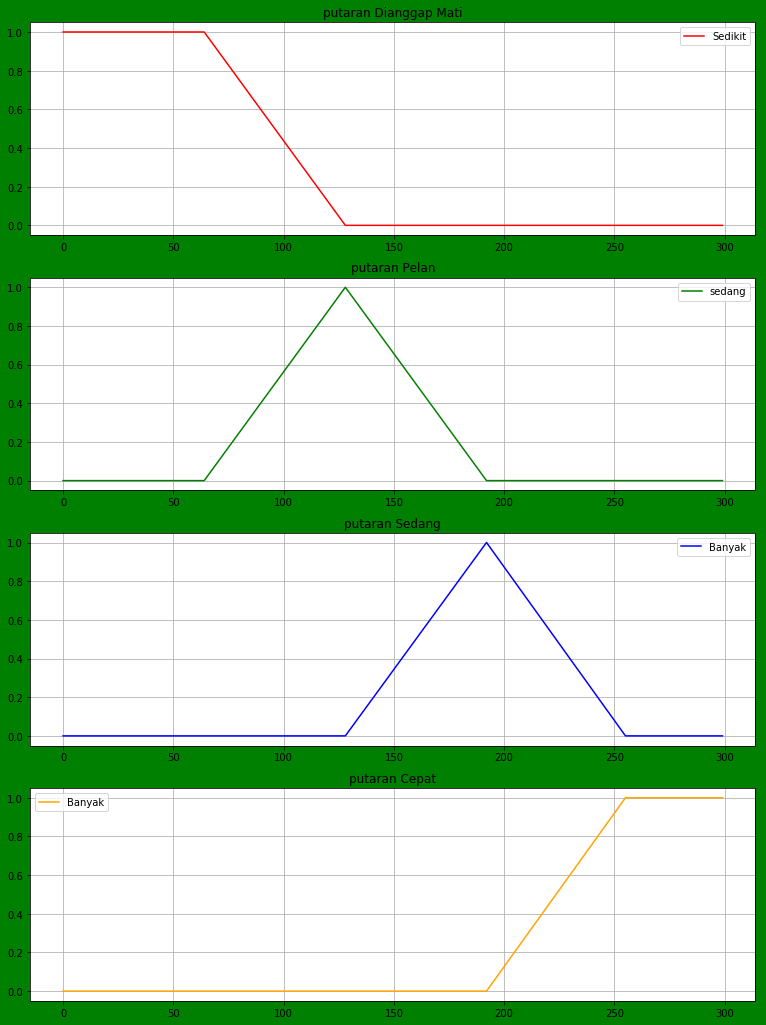

In [105]:
fig, (ax8,ax9,ax10,ax11) = plt.subplots(nrows= 4 ,facecolor='green', figsize=(13, 18))
ax8.plot(putaran, putaran_dianggapmati, 'red', linewidth=1.5, label='Sedikit')
ax8.set_title('putaran Dianggap Mati')
ax8.grid()
ax8.legend()

ax9.plot(putaran, putaran_pelan, 'green', linewidth=1.5, label='sedang')
ax9.set_title('putaran Pelan')
ax9.grid()
ax9.legend()

ax10.plot(putaran, putaran_sedang, 'blue', linewidth=1.5, label='Banyak')
ax10.set_title('putaran Sedang')
ax10.grid()
ax10.legend()

ax11.plot(putaran, putaran_cepat, 'orange', linewidth=1.5, label='Banyak')
ax11.set_title('putaran Cepat')
ax11.grid()
ax11.legend()


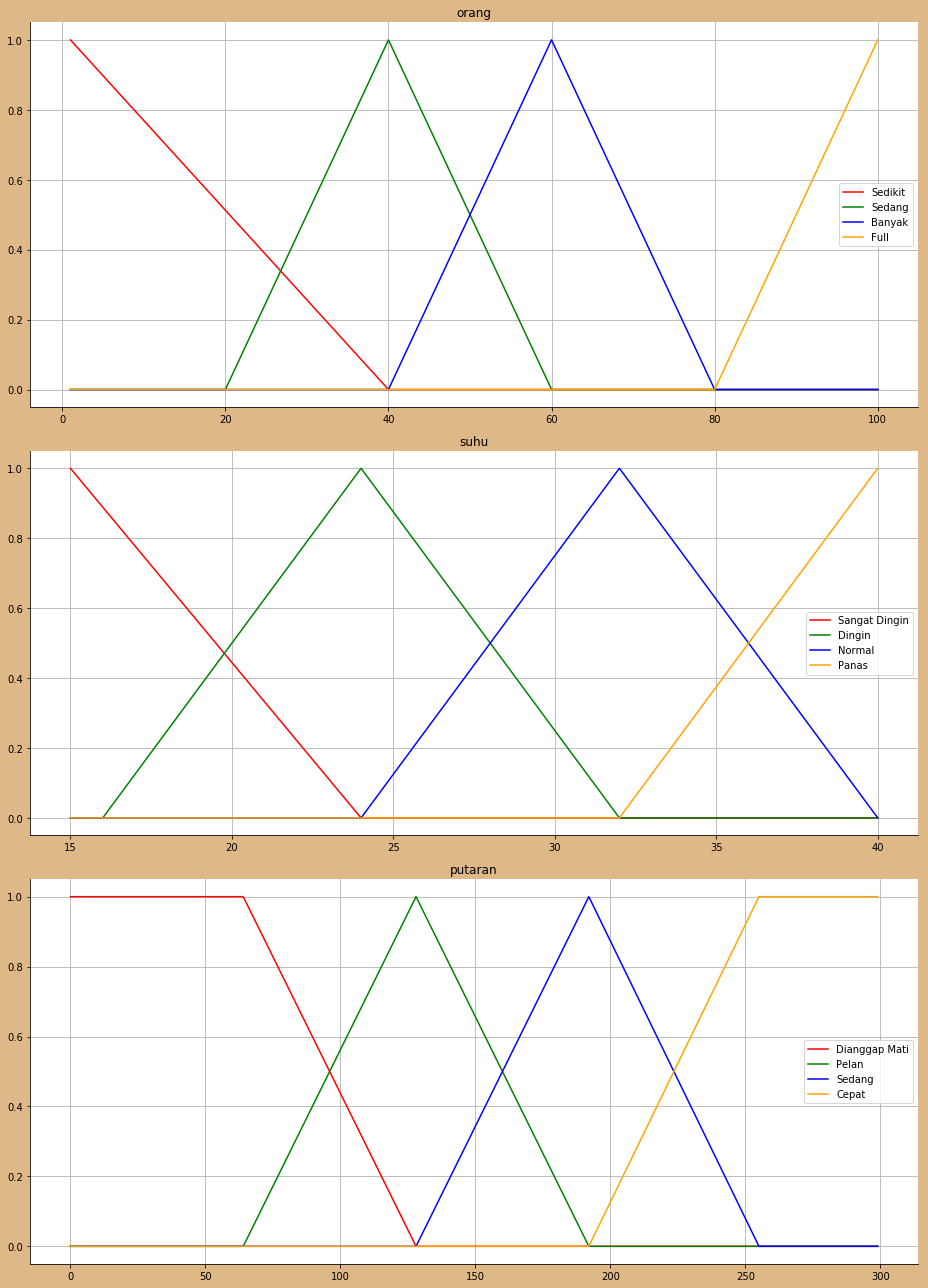

In [11]:
fig, (ax0,ax1,ax2) = plt.subplots(nrows= 3 ,facecolor='burlywood', figsize=(13, 18))
ax0.plot(orang, orang_sedikit, 'red', linewidth=1.5, label='Sedikit')
ax0.plot(orang, orang_sedang, 'green', linewidth=1.5, label='Sedang')
ax0.plot(orang, orang_banyak, 'blue', linewidth=1.5, label='Banyak')
ax0.plot(orang, orang_full, 'orange', linewidth=1.5, label='Full')
ax0.set_title('orang')
ax0.grid()
ax0.legend()

ax1.plot(suhu, suhu_sdingin, 'red', linewidth=1.5, label='Sangat Dingin')
ax1.plot(suhu, suhu_dingin, 'green', linewidth=1.5, label='Dingin')
ax1.plot(suhu, suhu_normal, 'blue', linewidth=1.5, label='Normal')
ax1.plot(suhu, suhu_panas, 'orange', linewidth=1.5, label='Panas')
ax1.set_title('suhu')
ax1.grid()
ax1.legend()

ax2.plot(putaran, putaran_dianggapmati, 'red', linewidth=1.5, label='Dianggap Mati')
ax2.plot(putaran, putaran_pelan, 'green', linewidth=1.5, label='Pelan')
ax2.plot(putaran, putaran_sedang, 'blue', linewidth=1.5, label='Sedang')
ax2.plot(putaran, putaran_cepat, 'orange', linewidth=1.5, label='Cepat')
ax2.set_title('putaran')
ax2.grid()
ax2.legend()

# Menghapus axes atas dan kanan
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.autoscale_view
    plt.tight_layout()

In [167]:
Jumlah_orang = input('masukkan jumlah orang  = ')
nilai_suhu = input('masukkan nilai suhu = ')

masukkan jumlah orang  = 30
masukkan nilai suhu = 28


In [168]:
print('Jumlah Orang = {},'.format(Jumlah_orang), 'Nilai suhu = {}'.format(nilai_suhu))

Jumlah Orang = 30, Nilai suhu = 28


Pada contoh kasus Masukkan Contoh Input **Jumlah Orang = 30** dan **Nilai Suhu = 28**

In [169]:
jumlah_orang_sedikit        = fuzz.interp_membership(orang, orang_sedikit, float(Jumlah_orang))
jumlah_orang_sedang          = fuzz.interp_membership(orang, orang_sedang, float(Jumlah_orang))
jumlah_orang_banyak         = fuzz.interp_membership(orang, orang_banyak, float(Jumlah_orang))
jumlah_orang_full         = fuzz.interp_membership(orang, orang_full, float(Jumlah_orang))

In [170]:
nilai_suhu_sdingin        = fuzz.interp_membership(suhu, suhu_sdingin, float(nilai_suhu))
nilai_suhu_dingin          = fuzz.interp_membership(suhu, suhu_dingin, float(nilai_suhu))
nilai_suhu_normal         = fuzz.interp_membership(suhu, suhu_normal, float(nilai_suhu))
nilai_suhu_panas         = fuzz.interp_membership(suhu, suhu_panas, float(nilai_suhu))

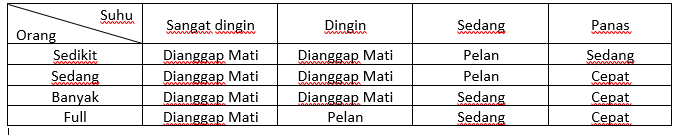

In [171]:
rule1  = np.fmin(jumlah_orang_sedikit, nilai_suhu_sdingin)
putar_dm = np.fmin(rule1, putaran_dianggapmati)

rule2  = np.fmin(jumlah_orang_sedang, nilai_suhu_sdingin)
putar_dm = np.fmin(rule2, putaran_dianggapmati)

rule3  = np.fmin(jumlah_orang_banyak, nilai_suhu_sdingin)
putar_dm = np.fmin(rule3, putaran_dianggapmati)

rule4  = np.fmin(jumlah_orang_full, nilai_suhu_sdingin)
putar_dm = np.fmin(rule4, putaran_dianggapmati)

rule5  = np.fmin(jumlah_orang_sedikit, nilai_suhu_dingin)
putar_dm = np.fmin(rule5, putaran_dianggapmati)

rule6  = np.fmin(jumlah_orang_sedang, nilai_suhu_dingin)
putar_dm = np.fmin(rule6, putaran_dianggapmati)

rule7  = np.fmin(jumlah_orang_banyak, nilai_suhu_dingin)
putar_dm = np.fmin(rule7, putaran_dianggapmati)

rule8  = np.fmin(jumlah_orang_full, nilai_suhu_dingin)
putar_p = np.fmin(rule8, putaran_pelan)

rule9  = np.fmin(jumlah_orang_sedikit, nilai_suhu_normal)
putar_p = np.fmin(rule9, putaran_pelan)

rule10  = np.fmin(jumlah_orang_sedang, nilai_suhu_normal)
putar_p = np.fmin(rule10, putaran_pelan)

rule11 = np.fmin(jumlah_orang_banyak, nilai_suhu_normal)
putar_s = np.fmin(rule11, putaran_sedang)

rule12  = np.fmin(jumlah_orang_full, nilai_suhu_normal)
putar_s = np.fmin(rule12, putaran_sedang)

rule13  = np.fmin(jumlah_orang_sedikit, nilai_suhu_panas)
putar_s = np.fmin(rule13, putaran_sedang)

rule14  = np.fmin(jumlah_orang_sedang, nilai_suhu_panas)
putar_c = np.fmin(rule14, putaran_cepat)

rule15  = np.fmin(jumlah_orang_banyak, nilai_suhu_panas)
putar_c = np.fmin(rule15, putaran_cepat)

rule16  = np.fmin(jumlah_orang_full, nilai_suhu_panas)
putar_c = np.fmin(rule16, putaran_cepat)


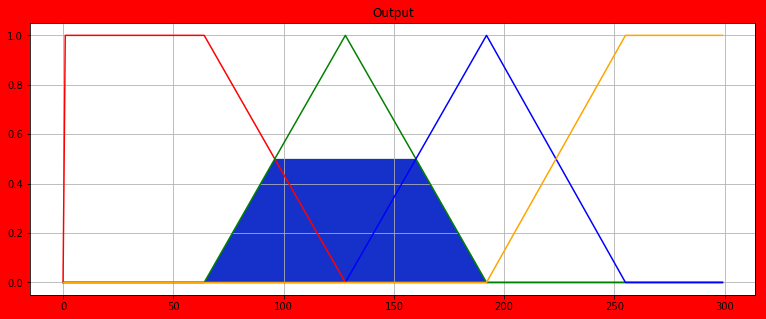

In [191]:

fig, ax20 = plt.subplots(figsize=(13, 5), facecolor='red')
ax20.fill_between(putaran, putar_dm, facecolor='red', alpha=0.7)
ax20.plot(putaran, putaran_dianggapmati, 'red', linewidth=1.5)

ax20.fill_between(putaran, putar_p, facecolor='green', alpha=0.7)
ax20.plot(putaran, putaran_pelan, 'green', linewidth=1.5)

ax20.fill_between(putaran, putar_s, facecolor='blue', alpha=0.7)
ax20.plot(putaran, putaran_sedang, 'blue', linewidth=1.5)

ax20.fill_between(putaran, putar_c, facecolor='blue', alpha=0.7)
ax20.plot(putaran, putaran_cepat, 'orange', linewidth=1.5)

ax20.set_title('Output')
ax20.grid()


In [173]:
aggregated = np.fmax(putar_dm, np.fmax(putar_p, putar_s, putar_c))

In [174]:
jumlah = fuzz.defuzz(putaran, aggregated, 'centroid')
jml = fuzz.interp_membership(putaran, aggregated, jumlah_bonus)

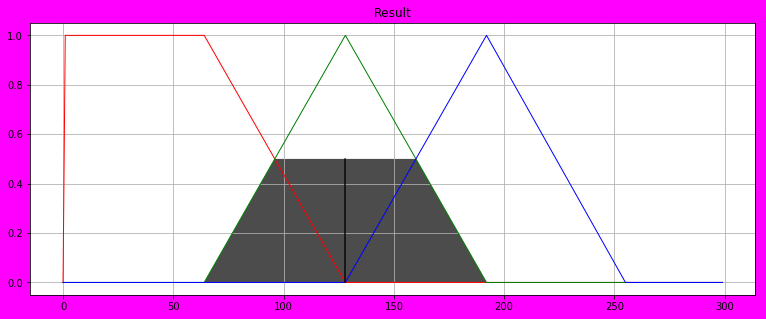

In [193]:
fig, ax0 = plt.subplots(figsize=(13, 5), facecolor='magenta')
ax0.plot(putaran, putaran_dianggapmati, 'red', linewidth=1)
ax0.plot(putaran, putaran_pelan, 'green', linewidth=1)
ax0.plot(putaran, putaran_sedang, 'blue', linewidth=1)
ax0.fill_between(putaran, aggregated, facecolor='black', alpha=0.7)
ax0.plot([jumlah, jumlah], [0, jml], 'k', linewidth=1.5, alpha=0.9)
ax0.set_title('Result')
ax0.grid()



In [194]:
print(jumlah)

128.0000000000002


# Hitung Manual

#### INFERENSI

diatas kita sudah memasukkan contoh angka yaitu **Jumlah Orang = 30** ada pada variabel sedikit dan sedang, dan **Nilai Suhu = 30 Derajat** yang ada pada variabel suhu dingin dan normal

 **Jumlah Orang = 30**
 Input Jumlah Orang dan juga rangenya adalah 

        Sedikit : 1-40
        Sedang : 20 - 60
        Banyak : 40 - 80
        Penuh : 60 - 100

 **Nilai Suhu = 28**
 Input Jumlah Orang dan juga rangenya adalah 

        Sangat Dingin : 15-24
        Dingin : 16 - 32
        Normal : 24 - 40
        Panas : 32 - 41

Selanjutnya adalah mencari fungsi implikasi dan defuzzyfikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum. Diambil dari rule based, maka ada 2 rule yang digunakan, yaitu:

1. Jika jumlah orang **sedikit** *(0.6)* dan suhu **dingin** *(0,25)*, maka putaran **dianggapmati**
2. Jika jumlah orang **sedang** *(0.4)* dan suhu **dingin** *(0,25)*, maka putaran **dianggapmati**
3. Jika jumlah orang **sedikit** *(0.6)* dan suhu **normal** *(0,75)*, maka putaran **pelan**
4. Jika jumlah orang **sedang** *(0.4)* dan suhu **normal** *(0,75)*, maka putaran **pelan**

## DEFUZZYFIKASI

Defuzzyfikasi dengan menggunakan metode centroid

**Nilai Segitiga Bawah**

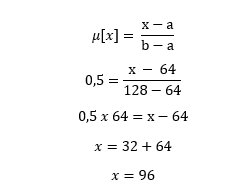

**Nilai Segitiga Atas**

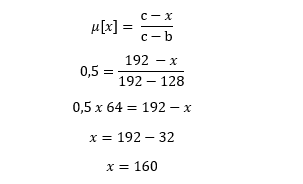

# Menentukan Nilai X

----------------------------------------------------------------------------------------------------------------

**X1**

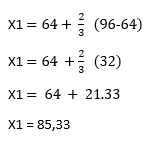

**X2**

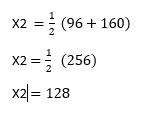

**X3**

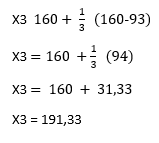

# Menentukan Nilai A


**A1**

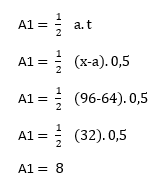

**A2**

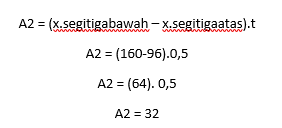

**A3**

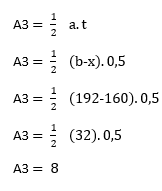

**Hasil Akhir**

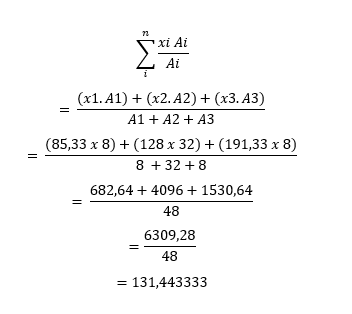

In [177]:
print(jumlah)

128.0000000000002


Hasil output yang dikeluarkan menggunakan code python 128,0000002 sedangkan perhitungan manual sebesar 131,443333
Terdapat perbedaan sebesar 3,444

**REFERENSI**

"Kontrol Kecepatan Kipas AC berbasis Fuzzy Logic"